In [ ]:
import csv
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import std
from numpy import mean
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from google.colab import files
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# **Load Data**

In [ ]:
df = pd.read_csv("School_levels_newest2.csv", encoding= 'unicode_escape')

In [ ]:
# Drop null values
df.isnull().sum().sum()

1245

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Number of samples left
len(df)

1890

Upon inspection, texts in English were found in the data, from which little to no features were extracted. Those were dropped.

In [ ]:
# List all features
for i in features:
  a = "'"+i+"',"
  a.strip()
  print(a)

'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Cohesive Complexity Feature: Mendes All Connectives per Token',
'Cohesive Complexity Feature: Mendes Causal Connectives per Token',
'Cohesive Complexity Feature: Mendes Concessive Connectives per Token',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Token',
'Cohesive Complexity Feature: Mendes Temporal Connectives per Token',
'Dependency Locality Theory: Maximal IC at Finite Verb (higher verb weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight + higher verb weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight + added verb weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight)',
'Depend

# **Classification Experiments**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 464].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM Classifier**

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf')

In [ ]:
# 10-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.862 (0.024)


In [ ]:
# 10-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(svm_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.859 (0.027)


**Experiment with held-out test set**

In [ ]:
svm_model.fit(X_train, y_train)

SVC(C=3)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.89      0.91        55
           2       0.87      0.79      0.83        75
           3       0.77      0.86      0.81        91
           4       0.92      0.91      0.91       157

    accuracy                           0.87       378
   macro avg       0.87      0.86      0.86       378
weighted avg       0.87      0.87      0.87       378



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[ 49   6   0   0]
 [  4  58  12   1]
 [  0   1  78  12]
 [  0   1  14 142]]


* **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(max_depth=15, n_estimators=200, random_state=0)

In [ ]:
# 10-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.795 (0.025)


In [ ]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.84      0.87      0.86        55
           2       0.76      0.55      0.64        75
           3       0.65      0.71      0.68        91
           4       0.81      0.86      0.83       157

    accuracy                           0.76       378
   macro avg       0.76      0.75      0.75       378
weighted avg       0.77      0.76      0.76       378



* **Logistic Regression Classifier**

In [ ]:
logisticRegr = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.1, max_iter=300)

In [ ]:
# 10-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.836 (0.032)


In [ ]:
# Classification with held-out test set
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=300, multi_class='multinomial')

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.89      0.88        55
           2       0.78      0.69      0.73        75
           3       0.70      0.76      0.73        91
           4       0.87      0.87      0.87       157

    accuracy                           0.81       378
   macro avg       0.81      0.80      0.80       378
weighted avg       0.81      0.81      0.81       378



* # **Feature Selection with WEKA**

* **Features selected by CFSSubsetEval**

In [ ]:
cfs_df = df[['Dependency Locality Theory: Total IC at Finite Verb (higher verb weight)',
'Lexical Richness: MTLD (excluding punctuation and numbers)',
'Lexical Richness: Type Token Ratio (10 Segments)',
'Lexical Richness: Type Token Ratio (Corrected TTR Verbs)',
'Lexical Richness: Type Token Ratio (Log10 TTR Lexical Words)',
'Lexical Richness: Type Token Ratio (Log10 TTR Nouns)',
'Lexical Richness: Type Token Ratio (Log10 TTR Verbs)',
'Lexical Richness: Type Token Ratio (Log10 TTR Words)',
'Lexical Richness: Type Token Ratio (STTR Lexical Words)',
'Lexical Richness: Type Token Ratio (STTR Nouns)',
'Lexical Richness: Type Token Ratio (Segments of Length 50)',
'Lexical Richness: Type Token Ratio (TTR Adjectives)',
'Lexical Richness: Type Token Ratio (TTR Nouns)',
'Lexical Richness: Type Token Ratio (TTR Verbs incl. modals per Lexical Types)',
'Lexical Richness: Type Token Ratio (Uber)',
'Lexical Sophistication Feature: Age of Acquisition (AW Token)',
'Lexical Sophistication Feature: Age of Acquisition (LW Token)',
'Lexical Sophistication Feature: Age of Acquisition (LW Type)',
'Lexical Sophistication Feature: Concreteness (AW Token)',
'Lexical Sophistication Feature: Concreteness (AW Type)',
'Lexical Sophistication Feature: Concreteness (FW Token)',
'Lexical Sophistication Feature: Concreteness (LW Type)',
'Lexical Sophistication Feature: Familiarity (AW Token)',
'Lexical Sophistication Feature: Familiarity (LW Type)',
'Lexical Sophistication Feature: Imageability (AW Token)',
'Lexical Sophistication Feature: Imageability (AW Type)',
'Lexical Sophistication Feature: Imageability (LW Token)',
'Lexical Sophistication Feature: Imageability (LW Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adv Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (N Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adv Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adv Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD N Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD N Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD V Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 1',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 5',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 1000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 2000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 5000',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adj Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD V Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (V Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adv Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (LW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (V Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (N Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD AW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adv Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD FW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD FW Type)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD LW Type)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD N Token)',
'Lexical Variation Feature: Adverb',
'Lexical Variation Feature: Lexical',
'Lexical Variation Feature: Verb',
'Mean Global Edit Distance for tokens',
'Mean Sentence Length in Syllables',
'Mean Token Length in Letters',
'Morphological Complexity Inflection Feature: Imperfect tense per verb token',
'Morphological Complexity Inflection Feature: Indicatives per Verb',
'Morphological Complexity Inflection Feature: Indicatives per word token',
'Morphological Complexity Inflection Feature: Past tense per verb token',
'Morphological Complexity Inflection Feature: Singular per word token',
'Morphological Complexity Inflection Feature: Third Person per word token',
'Morphological Complexity Inflection Feature: Past Participle Verb per Verb Token',
'Morphological Complexity Inflection Feature: Superlative Adjective per Adjective Token',
'Number of Morphological Features: Imperfect Verb per VP',
'Number of Morphological Features: Inflected Infinitive Verb per VP',
'Number of Word Tokens (including Punctuation and Numbers)',
'POS Density Feature: Article',
'POS Density Feature: Conjunction',
'POS Density Feature: Particle',
'POS Density Feature: Punctuation',
'Percentage of Word Types with More Than 2 Syllables',
'Referential Cohesion: Mean Global Lexical Overlap (lemma-based)',
'SD Sentence Length in Tokens',
'SD Token Length in Letters',
'SD Token Length in Syllables',
'Syntactic Complexity Feature: Complex Nominals per T-unit',
'Syntactic Complexity Feature: Inverted Pseudoclefts per VP',
'Syntactic Complexity Feature: Mean Length of Noun Phrase',
'Syntactic Complexity Feature: Prenominal Modifier per Complex Noun Phrase',
'Lexical Sophistication Feature: Complex Word',
'Lexical Sophistication Feature: Portuguese Vocabulary Profile A1',
'Lexical Sophistication Feature: Portuguese Vocabulary Profile B2',
'Morphological Complexity Inflection Feature: Conditional tense per verb token',
'Morphological Complexity Inflection Feature: Nominative Case per Token',
'Morphological Complexity Inflection Feature: Number per word token.1',
'Syntactic Complexity: Enclitics per VP',
'Syntactic Complexity Feature: Clausal Subjects per Sentence',
'Syntactic Complexity: Passive Sentences Per Sentence',
'Level']] 

In [ ]:
len(cfs_df.columns)

97

In [ ]:
X = cfs_df.iloc[:,:-1].values
y = cfs_df.iloc[:, 96].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM**

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf')

In [ ]:
# 10-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.846 (0.024)


In [ ]:
# WIth held-out test set
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        55
           2       0.85      0.73      0.79        75
           3       0.70      0.80      0.75        91
           4       0.88      0.86      0.87       157

    accuracy                           0.83       378
   macro avg       0.83      0.82      0.82       378
weighted avg       0.83      0.83      0.83       378



* **Featues selected by InfoGain in descending order of informativeness**

In [ ]:
infogain_df=df[['Lexical Sophistication Feature: Imageability (AW Type)',
'Lexical Sophistication Feature: Age of Acquisition (AW Token)',
'Lexical Sophistication Feature: Concreteness (LW Type)',
'Lexical Richness: Type Token Ratio (STTR Nouns)',
'Lexical Variation Feature: Lexical',
'Lexical Sophistication Feature: Concreteness (AW Type)',
'Lexical Richness: Type Token Ratio (Log10 TTR Lexical Words)',
'Lexical Richness: Type Token Ratio (TTR Lexical Words)',
'Lexical Richness: Type Token Ratio (TTR Nouns)',
'SD Token Length in Letters',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 1000',
'SD Token Length in Syllables',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (LW Type)',
'Lexical Richness: Type Token Ratio (Log10 TTR Nouns)',
'Lexical Richness: Type Token Ratio (TTR Verbs incl. modals per Lexical Types)',
'Lexical Richness: Type Token Ratio (Log TTR)',
'Lexical Richness: Type Token Ratio (Log10 TTR)',
'Morphological Complexity Inflection Feature: Nominative Case per Token',
'Lexical Richness: Type Token Ratio (Log10 TTR Words)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (LW Token)',
'Lexical Sophistication Feature: Concreteness (LW Token)',
'Lexical Richness: Type Token Ratio (TTR)',
'Lexical Sophistication Feature: Concreteness (AW Token)',
'Lexical Richness: Type Token Ratio (TTR Words)',
'Lexical Richness: Type Token Ratio (STTR Lexical Words)',
'Lexical Richness: Type Token Ratio (Uber10)',
'Lexical Richness: Type Token Ratio (Uber)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (LW Token)',
'Morphological Complexity Inflection Feature: Third Person per word token',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (LW Type)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 5',
'Lexical Variation Feature: Verb',
'Syntactic Complexity Feature: Mean Length of Complex T-unit',
'Syntactic Complexity Feature: Mean Length of T-unit',
'Mean T-unit Length in Tokens',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Type)',
'Lexical Richness: MTLD (excluding punctuation and numbers)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (LW Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
'Syntactic Complexity Feature: Complex Nominals per T-unit',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (N Token)',
'Syntactic Complexity Feature: Complex Nominals per Clause',
'Syntactic Complexity Feature: Mean Length of Clause',
'Mean Clause Length in Tokens',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Type)',
'Lexical Richness: Type Token Ratio (STTR Words)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (N Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD N Token)',
'Lexical Richness: Type Token Ratio (10 Segments)',
'Number Of Letters',
'Number of syllables',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (V Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (V Type)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (N Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Token)',
'Lexical Richness: Type Token Ratio (Segments of Length 50)',
'Lexical Richness: Type Token Ratio (STTR)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD AW Token)',
'Morphological Complexity Inflection Feature: Indicatives per word token',
'Morphological Complexity Inflection Feature: Infinite Verb Density',
'Morphological Complexity Inflection Feature: Past tense per verb token',
'Morphological Complexity Inflection Feature: Preterite Verb per Verb Token',
'Syntactic Complexity Feature: Prepositional Phrases per T-Unit',
'Syntactic Complexity Feature: Prepositional Phrases per Clause',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD N Type)',
'Morphological Complexity Inflection Feature: Any Person per word token.1',
'Number of Morphological Features: Preterite Verb per VP',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adv Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (N Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Type)',
'Morphological Complexity Inflection Feature: Gender inflection per word token.1',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adv Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adv Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (N Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adv Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adv Token)',
'Lexical Richness: Type Token Ratio (Log10 TTR Verbs)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (V Token)',
'Number of Morphological Features: Preterite Verb',
'Mean Token Length in Letters',
'Referential Cohesion: Global Lemma Overlap',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD LW Type)',
'Lexical Variation Feature: Noun',
'Lexical Sophistication Feature: Portuguese Vocabulary Profile A1',
'Referential Cohesion: Global Noun Overlap (lemma-based)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (LW Type)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (N Token)',
'Lexical Richness: HDD (excluding punctuation and numbers)',
'Morphological Complexity Inflection Feature: Imperfect tense per verb token',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (N Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adv Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adv Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD LW Type)',
'Syntactic Complexity Feature: Noun Phrases per T-unit',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD N Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adv Type)',
'Lexical Richness: Type Token Ratio (TTR Verbs incl. modals)',
'Mean Token Length in Syllables',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (N Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (V Type)',
'Number of Morphological Features: Imperfect Verb per VP',
'Lexical Richness: Type Token Ratio (TTR Nouns per Lexical Types)',
'Syntactic Complexity Feature: Noun Phrases per Clause',
'Lexical Richness: Type Token Ratio (STTR Adjectives)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD N Type)',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below',
'Syntactic Complexity Feature: Prenominal Modifier per Complex Noun Phrase',
'Syntactic Complexity Feature: Complex Nominals per Sentence',
'Mean Sentence Length in Letters',
'Lexical Sophistication Feature: Familiarity (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD V Token)',
'Lexical Sophistication Feature: Familiarity (LW Token)',
'Syntactic Complexity Feature: Prepositional Phrases per Sentence',
'Referential Cohesion: Global Noun Overlap (word form-based)',
'Lexical Richness: Type Token Ratio (TTR Adjectives)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adv Type)',
'Lexical Sophistication Feature: Familiarity (AW Type)',
'POS Density Feature: Conjunction',
'Lexical Sophistication Feature: Familiarity (LW Type)',
'Lexical Richness: Type Token Ratio (TTR Adverbs per Lexical Types)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adv Token)',
'Mean Sentence Length in Syllables',
'Lexical Richness: Type Token Ratio (Root TTR Verbs)',
'Lexical Richness: Type Token Ratio (Corrected TTR Verbs)',
'POS Density Feature: Adverb',
'POS Density Feature: Verb',
'Morphological Complexity Inflection Feature: Past Participle Verb per Verb Token',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adv Token)',
'Number of Word Tokens (including Punctuation and Numbers)',
'Lexical Richness: Type Token Ratio (Root TTR Words)',
'Lexical Richness: Type Token Ratio (Corrected TTR Words)',
'Number of Syntactic Constituents: Prepositional Phrase',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (V Token)',
'Number of Tokens',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD V Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD V Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adv Type)',
'Lexical Richness: Type Token Ratio (Log10 TTR Adjectives)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD FW Type)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD AW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD V Token)',
'Number of Word Tokens (excluding punctuation and numbers)',
'Number of Syntactic Constituents: Complex Noun Phrase',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD LW Token)',
'Lexical Variation Feature: Adverb',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adj Type)',
'Morphological Complexity Inflection Feature: Passive verbs per verb token',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adj Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (FW Token)',
'POS Density Feature: Pronoun',
'Lexical Richness: Type Token Ratio (Corrected TTR Nouns)',
'Lexical Richness: Type Token Ratio (Root TTR Nouns)',
'Lexical Richness: Type Token Ratio (Corrected TTR)',
'Lexical Richness: Type Token Ratio (Root TTR)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD AW Token)',
'Lexical Variation Feature: Corrected Verb Variation 1',
'Lexical Variation Feature: Squared Verb Variation 1',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Token)',
'Referential Cohesion: Mean Global Noun Overlap (lemma-based)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (LW Token)',
'POS Density Feature: Proper Noun',
'Cohesive Complexity Feature: Mendes All Connectives per Token',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Token',
'Lexical Richness: Type Token Ratio (Root TTR Lexical Words)',
'Lexical Richness: Type Token Ratio (Corrected TTR Lexical Words)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (V Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD V Token)',
'POS Density Feature: Noun',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adj Type)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 1',
'POS Density Feature: Preposition',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)',
'Number of Unique Words',
'Referential Cohesion: Global Argument Overlap (lemma-based)',
'Number of Syntactic Constituents: T-units',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 3',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (V Token)',
'Mean Sentence Length in Tokens',
'SD Global Edit Distance for tokens',
'Syntactic Complexity Feature: Mean Length of Prepositional Phrase',
'POS Density Feature: Adjective',
'Lexical Sophistication Feature: Complex Word',
'Referential Cohesion: Mean Global Noun Overlap (word form-based)',
'SD Global Edit Distance for POS',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adj Token)',
'Number of Tokens with More Than 2 Syllables',
'Lexical Variation Feature: Verb Variation 1',
'Number of Syntactic Constituents: Verb Phrase',
'POS Density Feature: Subordinating Conjunction',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (FW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (V Type)',
'SD Global Edit Distance for Lemmas',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)',
'SD Sentence Length in Syllables',
'Syntactic Complexity: Passive Sentences Per Sentence',
'SD Sentence Length in Letters',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (FW Token)',
'Morphological Complexity Inflection Feature: Number per word token.1',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD LW Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 2',
'Number of Word Types (excluding Punctuation and numbers)',
'Lexical Richness: Type Token Ratio (STTR Verbs)',
'Number of Syntactic Constituents: Complex T-units',
'Number of Word Types',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Type)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (FW Type)',
'Number of Morphological Features: Passive Verb',
'Percentage of Word Types with More Than 2 Syllables',
'Lexical Richness: Type Token Ratio (STTR Adverbs)',
'Number of Morphological Features: Inflected Infinitive Verb per VP',
'Number of Syntactic Constituents: Clauses',
'Mean Local Edit Distance for tokens',
'Referential Cohesion: Global Lexical Overlap (lemma-based)',
'Syntactic Complexity: Enclitics per VP',
'Morphological Complexity Inflection Feature: Indicatives per Verb',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adv Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adj Type)',
'Number of Syntactic Constituents: Passive Sentences',
'Morphological Complexity Inflection Feature: Singular per word token',
'Syntactic Complexity Feature: Noun Phrases per Sentence',
'Referential Cohesion: Mean Global Argument Overlap (lemma-based)',
'Number of Word Types (including Punctuation and Numbers)',
'Syntactic Complexity: Clitics per VP',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adv Token)',
'SD Sentence Length in Tokens',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD AW Type)',
'Morphological Complexity Inflection Feature: Past Participle Verb Density',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD V Type)',
'POS Density Feature: Punctuation',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adj Token)',
'Lexical Variation Feature: Adjective',
'Lexical Richness: Type Token Ratio (TTR Adjectives per Lexical Types)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adv Type)',
'Number of Syntactic Constituents: Dependent Clauses',
'Number of Syntactic Constituents: Subordinate Clauses',
'Number of Syntactic Constituents: Subordinate Clauses.1',
'Mean Local Edit Distance for POS',
'Number of Word Types with More Than 2 Syllables',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD FW Token)',
'Number of Syntactic Constituents: Noun Phrase',
'Syntactic Complexity Feature: Adjectival Clause per Sentence',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adj Type)',
'Number of Sentences',
'Number of Syntactic Constituents: Adjectival Clause',
'Syntactic Complexity Feature: Mean Length of Verb Cluster',
'Referential Cohesion: SD of Global Noun Overlap (lemma-based)',
'Number of Syntactic Constituents: Sentences',
'Referential Cohesion: Mean Global Lexical Overlap (lemma-based)',
'Number of Syntactic Constituents: Prenominal Noun Modifier',
'Mean Global Edit Distance for tokens',
'Morphological Complexity Inflection Feature: Future tense per verb token',
'POS Density Feature: Coordinating Conjunction',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adv Token)',
'Lexical Richness: Type Token Ratio (Root TTR Adjectives)',
'Lexical Richness: Type Token Ratio (Corrected TTR Adjectives)',
'Morphological Complexity Inflection Feature: First Person per word token',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adj Token)',
'Number of Morphological Features: Subjunctive Verb per VP',
'Number of Morphological Features: Present Subjunctive Verb per VP',
'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Mean Local Edit Distance for Lemmas',
'Number of Enclitics',
'Syntactic Complexity Feature: Mean Length of Noun Phrase',
'Number of Syntactic Constituents: Clausal Complement.1',
'Number of Syntactic Constituents: Relative Clauses',
'Referential Cohesion: SD of Global Argument Overlap (lemma-based)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD V Type)',
'SD Local Edit Distance for POS',
'SD Local Edit Distance for tokens',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD LW Type)',
'Syntactic Complexity Feature: Dependent clauses per Sentence',
'Syntactic Complexity Feature: Subordinate Clauses per Sentence',
'Number of Syntactic Constituents: Null Subject',
'Number of Connectives: Mendes Single-Word Connectives',
'Number of Connectives: Mendes All Connectives',
'Referential Cohesion: SD of Global Noun Overlap (word form-based)',
'Syntactic Complexity Feature: Complex T-unit per Sentence',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (FW Token)',
'Syntactic Complexity Feature: Sentence Coordination Ratio',
'Syntactic Complexity Feature: Verb Phrases per Sentence',
'Number of Syntactic Constituents: Adverbial Clauses',
'Mean Global Edit Distance for Lemmas',
'Number of Morphological Features: Simple Future Verb per VP',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 2000',
'Lexical Density Feature: Lexical Words per Word',
'Dependency Locality Theory: Total IC at Finite Verb (higher verb weight)',
'Syntactic Complexity Feature: Clausal Subjects per Sentence',
'Syntactic Complexity Feature: Clausal Complements per Sentence',
'Number of Syntactic Constituents: Clausal Complement',
'Lexical Richness: Type Token Ratio (TTR Adverbs)',
'Dependency Locality Theory: Maximal IC at Finite Verb (original cost configuration)',
'Number of Syntactic Constituents: Clausal Subject',
'Syntactic Complexity Feature: Sentence Complexity Ratio',
'POS Density Feature: Article',
'POS Density Feature: Determiner',
'Number of Clititcs',
'SD Local Edit Distance for Lemmas',
'Syntactic Complexity Feature: Dependent clause ratio',
'Morphological Complexity Inflection Feature: Subjunctives per verb token',
'Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight)',
'Morphological Complexity Inflection Feature: Present Subjunctive Verb per Verb Token',
'Dependency Locality Theory: Total IC at Finite Verb (less coordination weight + higher verb weight)',
'POS Density Feature: Auxiliary Verb',
'Morphological Complexity Inflection Feature: Feminine inflection per word token',
'Number of Morphological Features: Present Subjunctive Verb',
'POS Density Feature: Particle',
'Cohesive Complexity Feature: Mendes Temporal Connectives per Token',
'Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight + higher verb weight)',
'Dependency Locality Theory: Total IC at Finite Verb (original cost configuration)',
'Number of Syntactic Constituents: Verb Cluster',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD N Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD LW Token)',
'Syntactic Complexity Feature: Relative Clauses per Sentence',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD N Token)',
'Mean Left Embeddedness',
'Syntactic Complexity Feature: Dependent clauses per T-unit',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (FW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adj Type)',
'Syntactic Complexity Feature: Null Subjects per Sentence',
'Dependency Locality Theory: Maximal IC at Finite Verb (higher verb weight)',
'Number of Morphological Features: Indefinite Pronouns',
'Morphological Complexity Inflection Feature: Subjunctives per word token',
'Morphological Complexity Inflection Feature: Simple Future Verb per Verb Token',
'Lexical Richness: Type Token Ratio (Corrected TTR Adverbs)',
'Lexical Richness: Type Token Ratio (Root TTR Adverbs)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adj Token)',
'Dependency Locality Theory: Total IC at Finite Verb (less coordination weight)',
'Number of Morphological Features: Simple Future Verbs',
'POS Density Feature: Functional Words',
'Percentage of Tokens with More Than 2 Syllables',
'POS Density Feature: Lexical Words',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 5000',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adj Type)',
'Lexical Sophistication Feature: Concreteness (FW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (FW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adj Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (FW Type)',
'Syntactic Complexity Feature: Open clausal Complements per Sentence',
'Number of Syntactic Constituents: Agent Modifier',
'Morphological Complexity Inflection Feature: Conditional tense per verb token',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 7',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD FW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD FW Token)',
'Lexical Richness: Type Token Ratio (TTR Adjectives and Adverbs per Lexical Types)',
'Referential Cohesion: SD of Global Lexical Overlap (lemma-based)',
'Number of Morphological Features: Conditional Verb per VP',
'SD Left Embeddedness',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adj Token)',
'Number of Morphological Features: Relative Pronouns',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD FW Type)',
'Morphological Complexity Inflection Feature: Masculine inflection per word token',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD N Token)',
'Lexical Richness: Type Token Ratio (Log10 TTR Adverbs)',
'Mean Global Edit Distance for POS',
'Lexical Variation Feature: Modifier',
'POS Density Feature: Interjection',
'POS Density Feature: Modifier',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD FW Token)',
'Number of Syntactic Constituents: Coordinate Phrases',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adj Type)',
'Syntactic Complexity Feature: Adverbial Clause per Sentence',
'Morphological Complexity Inflection Feature: Superlative Adjective per Adjective Token',
'Syntactic Complexity: Complementizer Phrase Per Sentence',
'Syntactic Complexity Feature: e-que Cleft per VP',
'Lexical Sophistication Feature: Portuguese Vocabulary Profile B1',
'Number of Syntactic Constituents: e-que Clefts',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 4',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD N Type)',
'Syntactic Complexity Feature: Verb Cluster per Sentence',
'Number of Connectives: Mendes Temporal Connectives',
'Number of Syntactic Constituents: Open Clausal Complement',
'POS Density Feature: Symbol',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight + added verb weight)',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 4000',
'Number of Syntactic Constituents: VS Order',
'Syntactic Complexity Feature: Relative Clauses per Clause',
'Number of Syntactic Constituents: Complementizer Phrase',
'Syntactic Complexity Feature: Coordinate Phrases per Sentence',
'POS Density Feature: Foreign Word',
'Lexical Sophistication Feature: Portuguese Vocabulary Profile B2',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adj Token)',
'Syntactic Complexity Feature: Relative Clauses per T-Unit',
'Morphological Complexity Inflection Feature: Pluperfect Verb per Verb Token',
'Syntactic Complexity Feature: Inverse Order (VS) per Sentence',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adj Type)',
'Number of Morphological Features: Pluperfect Verb per VP',
'Number of Syntactic Constituents: No Connective Coordinate Phrases',
'Syntactic Complexity Feature: Disjunctive Coordinate Phrases per Sentence',
'Number of Syntactic Constituents: Disjunctive Coordinate Phrases',
'Number of Morphological Features: Pluperfect Verbs',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD FW Token)',
'POS Density Feature: Cardinal Number',
'Lexical Sophistication Feature: Portuguese Vocabulary Profile A2',
'Syntactic Complexity Feature: Verb Cluster per Clause',
'Syntactic Complexity Feature: Verb Cluster per T-Unit',
'Number of Morphological Features: Superlative Degree',
'Morphological Complexity Inflection Feature: Gerund Verb per Verb Token',
'Syntactic Complexity: Asyndetic Coordinate Phrases Per Sentence',
'Morphological Complexity Inflection Feature: Accusative Case per Token',
'Number of Connectives: Mendes Additive Connectives',
'Syntactic Complexity Feature: Inverted Pseudoclefts per VP',
'Number of Syntactic Constituents: Inverted Pseudoclefts',
'Number of Syntactic Constituents: Pseudoclefts',
'Dependency Locality Theory: Total IC at Finite Verb (no modifier weight + less coordination weight + added verb weight)',
'Level']]

In [ ]:
len(infogain_df.columns)

418

In [ ]:
X = infogain_df.iloc[:,:-1].values
y = infogain_df.iloc[:, 417].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf')

In [ ]:
# 10-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.868 (0.024)


In [ ]:
# With held-out test set
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions)) # With highest 417

              precision    recall  f1-score   support

           1       0.92      0.89      0.91        55
           2       0.86      0.75      0.80        75
           3       0.74      0.87      0.80        91
           4       0.92      0.90      0.91       157

    accuracy                           0.86       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.87      0.86      0.86       378



In [ ]:
print(metrics.classification_report(y_test, predictions)) # With highest 250

              precision    recall  f1-score   support

           1       0.91      0.89      0.90        55
           2       0.84      0.76      0.80        75
           3       0.70      0.80      0.74        91
           4       0.89      0.86      0.88       157

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.84      0.83      0.83       378



In [ ]:
print(metrics.classification_report(y_test, predictions)) # With highest 200

              precision    recall  f1-score   support

           1       0.86      0.87      0.86        55
           2       0.81      0.73      0.77        75
           3       0.69      0.77      0.73        91
           4       0.87      0.84      0.85       157

    accuracy                           0.81       378
   macro avg       0.81      0.80      0.80       378
weighted avg       0.81      0.81      0.81       378



In [ ]:
print(metrics.classification_report(y_test, predictions)) # With highest 150

              precision    recall  f1-score   support

           1       0.84      0.89      0.87        55
           2       0.81      0.73      0.77        75
           3       0.70      0.73      0.71        91
           4       0.86      0.87      0.86       157

    accuracy                           0.81       378
   macro avg       0.80      0.80      0.80       378
weighted avg       0.81      0.81      0.81       378



* # **Verify how Linear Discriminant Analysis discriminated between levels**

In [ ]:
# Verify how well the aggregated features can be separated
target_names = (1,2,3,4)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

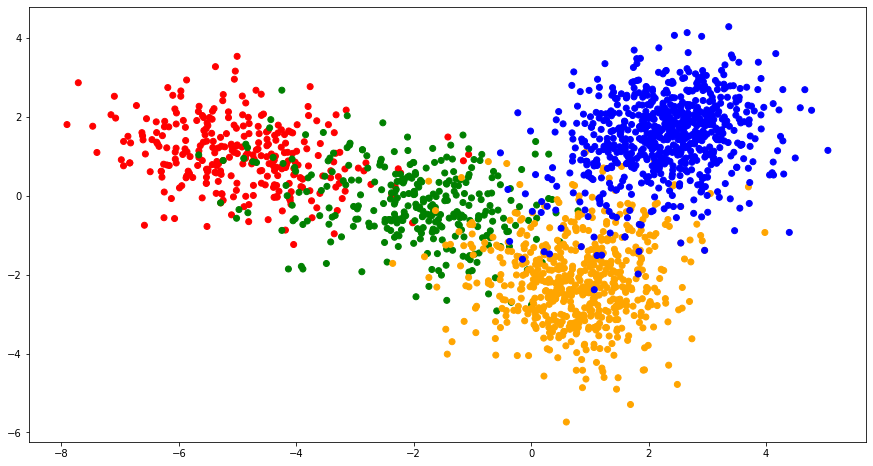

In [ ]:
#Plot LDA
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'orange', 4:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Level'].map(colors))
plt.show()

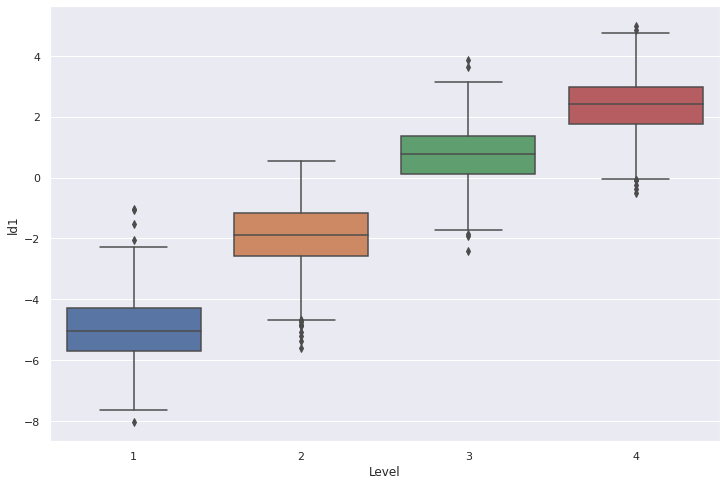

In [ ]:
# Verify Linear Discriminant 1 distribution throughout levels
lda_df=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Level"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Level', y='ld1', data=lda_df)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

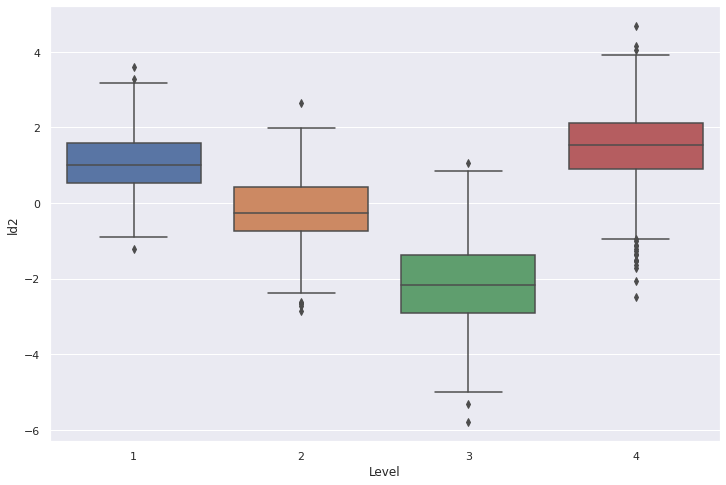

In [ ]:
# Verify Linear Discriminant 2 distribution throughout levels
lda_df=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Level"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Level', y='ld2', data=lda_df)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

# **Model Explanations with SHAP**

In order to apply SHAP, the data was shuffled, cut at 580 samples, then undersampled at 344 instances

In [ ]:
# Shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.iloc[:580, :-1].values
y = df.iloc[:580, 410].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
# Balance class distributions
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)
print(f"Samples: {Counter(y)}")

Samples: Counter({1: 86, 2: 86, 3: 86, 4: 86})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(C=3, probability=True)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions)) # With undersampling

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.84      0.80      0.82        20
           3       0.87      0.72      0.79        18
           4       0.73      1.00      0.85        11

    accuracy                           0.87        69
   macro avg       0.86      0.88      0.86        69
weighted avg       0.88      0.87      0.87        69



In [ ]:
# compute SHAP values
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
features_names = df.columns[:-1]

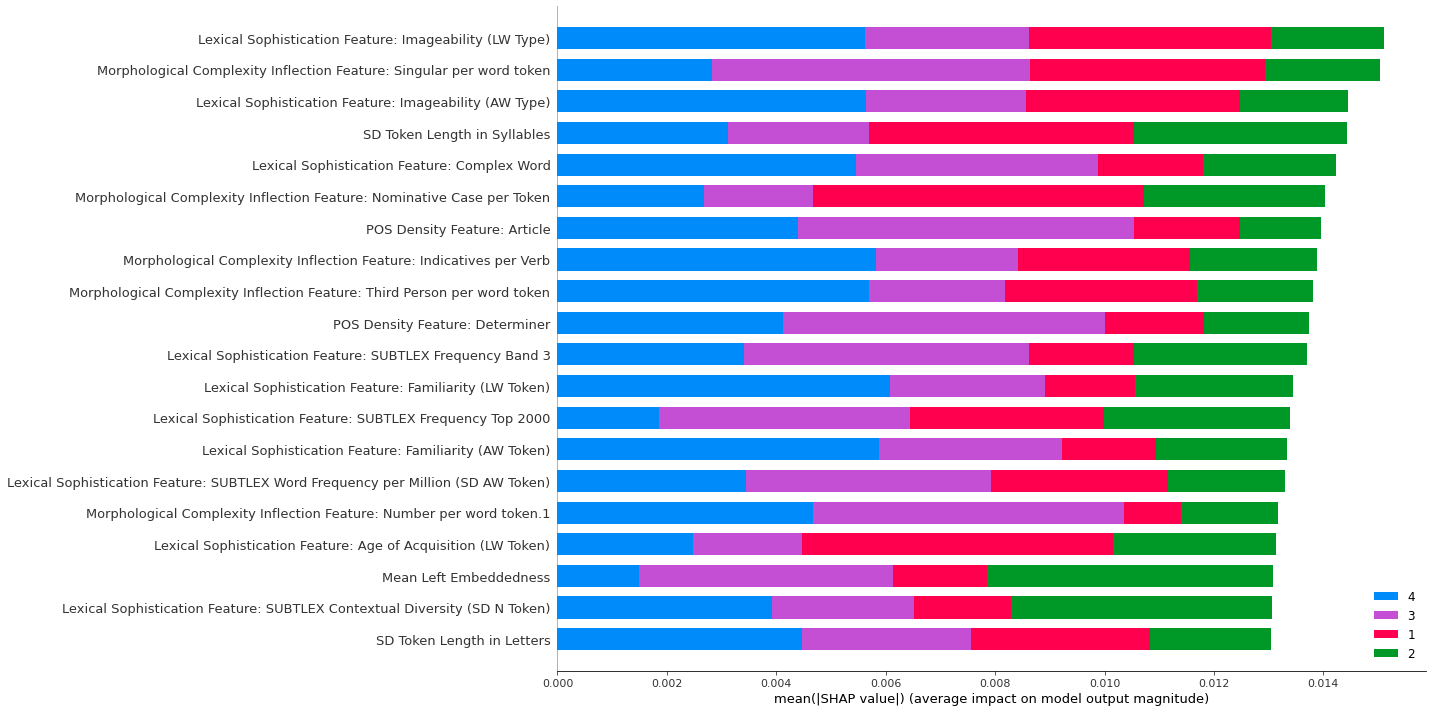

In [ ]:
class_names = ['1', '2', '3', '4']
shap.summary_plot(shap_values, X, plot_type="bar", class_names= class_names, feature_names = features_names, plot_size=[20,10], max_display=20)

* **Density plot of top 20 most important features for level 1**

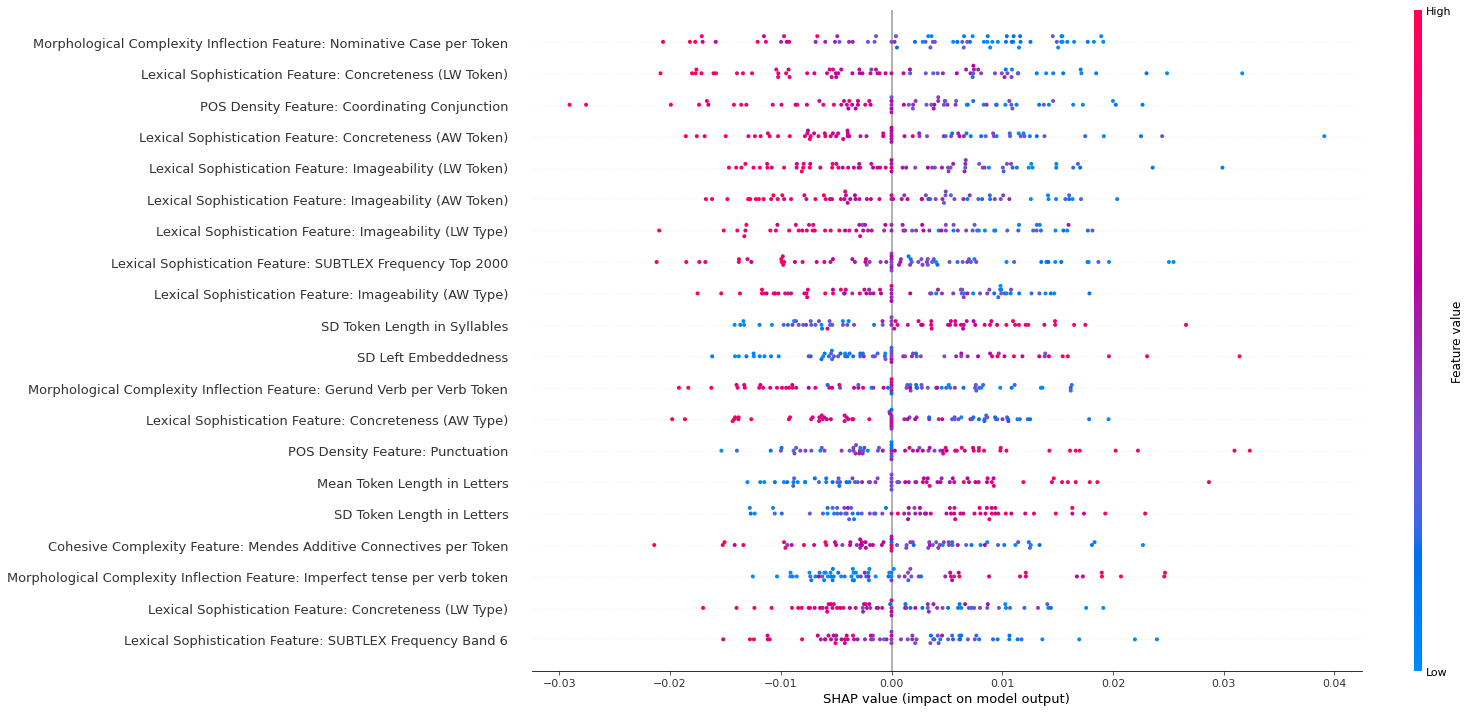

In [ ]:
shap.summary_plot(shap_values[0], X_test, feature_names = features_names, plot_size=[22,10])

* **Density plot of top 20 most important features level 2**

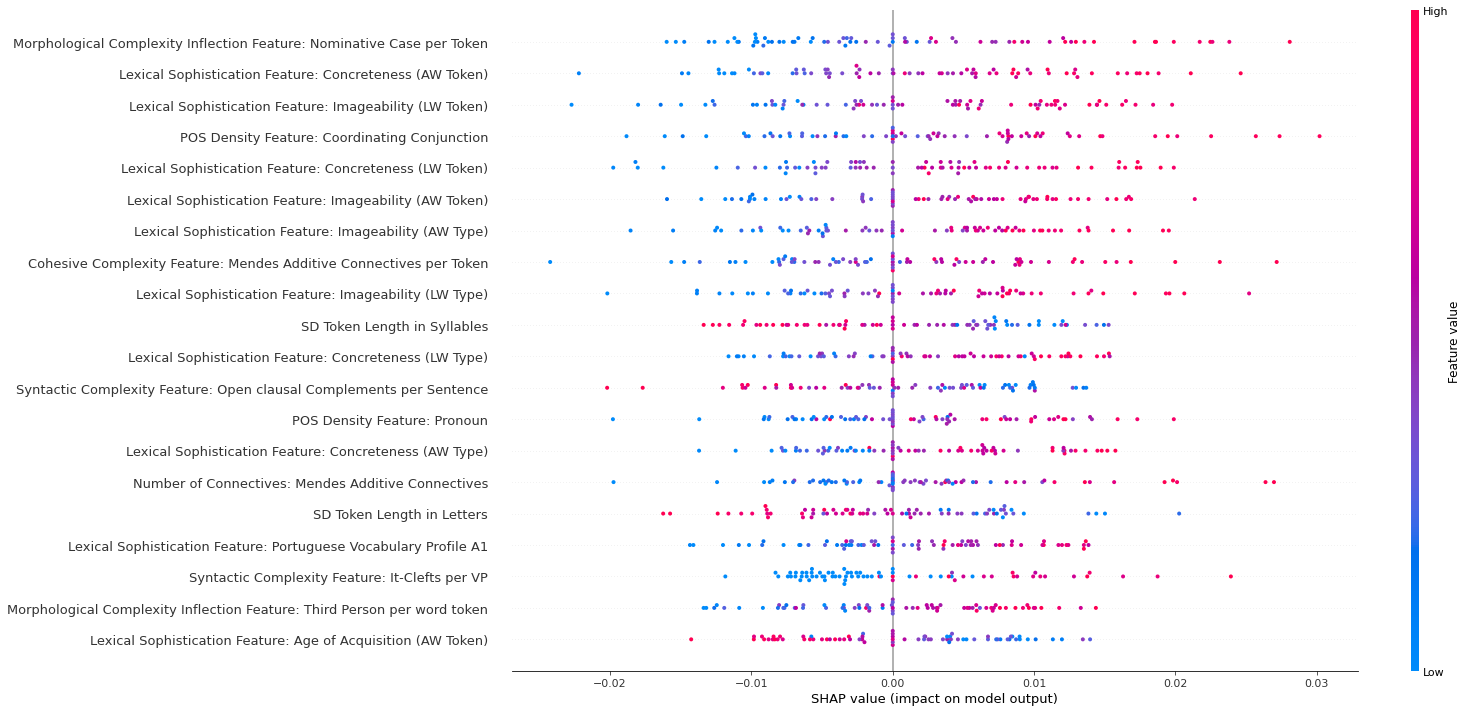

In [ ]:
shap.summary_plot(shap_values[1], X_test, feature_names = features_names, plot_size=[22,10])

* **Density plot of top 20 most important features level 3**

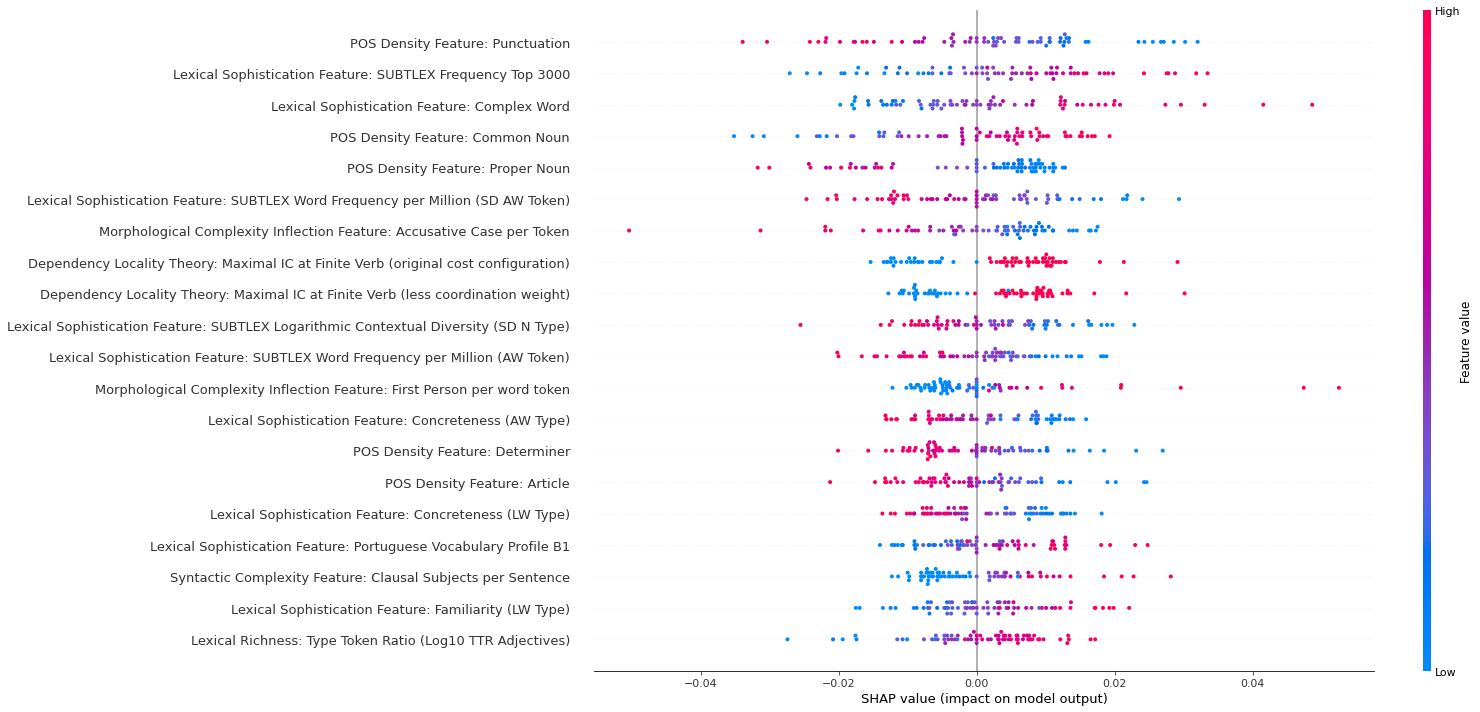

In [ ]:
shap.summary_plot(shap_values[2], X_test, feature_names = features_names, plot_size=[22,10])

* **Density plot of top 20 most important features level 4**

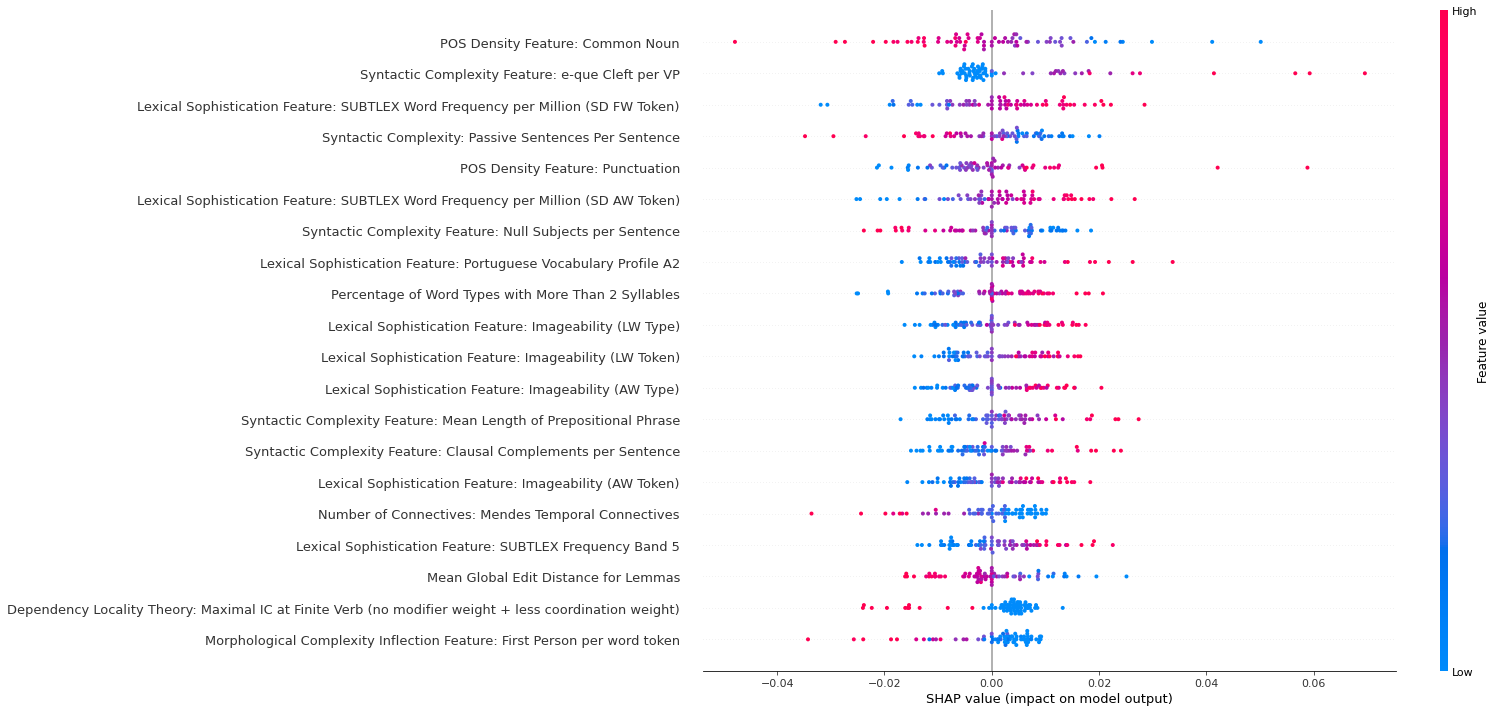

In [ ]:
shap.summary_plot(shap_values[3], X_test, feature_names = features_names, plot_size=[22,10])

# **Binary classifiers**

## **Discriminating between 1 vs 2**

In [ ]:
# Create list of feature names
features_names = df.columns[:-1]

In [ ]:
# Delete levels 3 and 4
df = df[df.Level != 3]
df = df[df.Level != 4]

In [ ]:
df['Level'].value_counts()

2    311
1    291
Name: Level, dtype: int64

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 464].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
svm_model = svm.SVC(C=3, kernel='rbf')

In [ ]:
# Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.907 (0.044)


In [ ]:
# Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
print('Weighted F1: %.3f (%.3f)' % (mean(scores), std(scores)))

Weighted F1: 0.907 (0.044)


* **Apply SHAP on a sample of 340 instamces**

In [ ]:
X = df.iloc[:370, :-1].values
y = df.iloc[:370, 410].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)
print(f"Samples: {Counter(y)}")

Samples: Counter({0: 170, 1: 170})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(C=3, probability=True)

In [ ]:
# compute SHAP values
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
features_names = df.columns[:-1]

* **Density plot of 20 most important features**

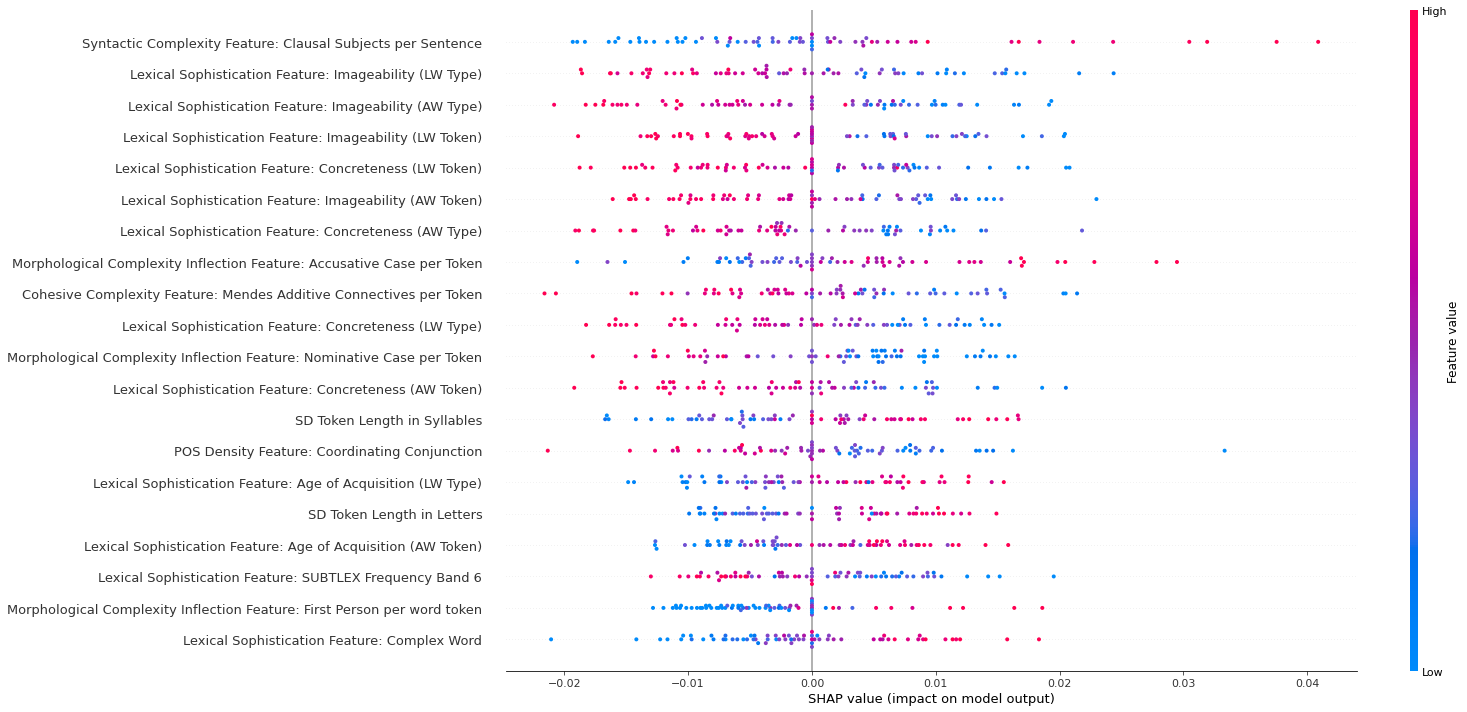

In [ ]:
shap.summary_plot(shap_values[0], X_test, feature_names = features_names, plot_size=[22,10])

## **Discriminating between 2 vs {3, 4}**

In [ ]:
#Create feature list
features_names = df.columns[:-1]

In [ ]:
# Delete level 1
df = df[df.Level != 1]

In [ ]:
# Rename classes
df['Level'] = df['Level'].replace([2], 0)
df['Level'] = df['Level'].replace([3], 1)
df['Level'] = df['Level'].replace([4], 1)

In [ ]:
df['Level'].value_counts()

1    1288
0     311
Name: Level, dtype: int64

In [ ]:
# Shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 464].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
# Balance class distributions
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)
print(f"Samples: {Counter(y)}")

Samples: Counter({0: 311, 1: 311})


In [ ]:
svm_model = svm.SVC(C=3, kernel='rbf')

* **Classification of levels 2 and 4+3 with cross-validation**

In [ ]:
# 10-fold Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.890 (0.043)


In [ ]:
# 10-fold Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
print('Weighted F1: %.3f (%.3f)' % (mean(scores), std(scores)))

Weighted F1: 0.889 (0.043)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **Experiment with held-out test set**

In [ ]:
svm_model.fit(X_train, y_train)

SVC(C=3)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions)) # With undersampling

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        70
           1       0.85      0.95      0.90        55

    accuracy                           0.90       125
   macro avg       0.90      0.91      0.90       125
weighted avg       0.91      0.90      0.90       125



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[61  9]
 [ 3 52]]


* **Apply SHAP to a sample of 352 instances**

In [ ]:
X = df.iloc[:940, :-1].values
y = df.iloc[:940, 464].values

In [ ]:
# Scale feature values
X = StandardScaler().fit_transform(X)

In [ ]:
# Balance class distribution
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)
print(f"Samples: {Counter(y)}")

Samples: Counter({0: 176, 1: 176})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(C=3, probability=True)

In [ ]:
# compute SHAP values
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
features_names = df.columns[:-1]

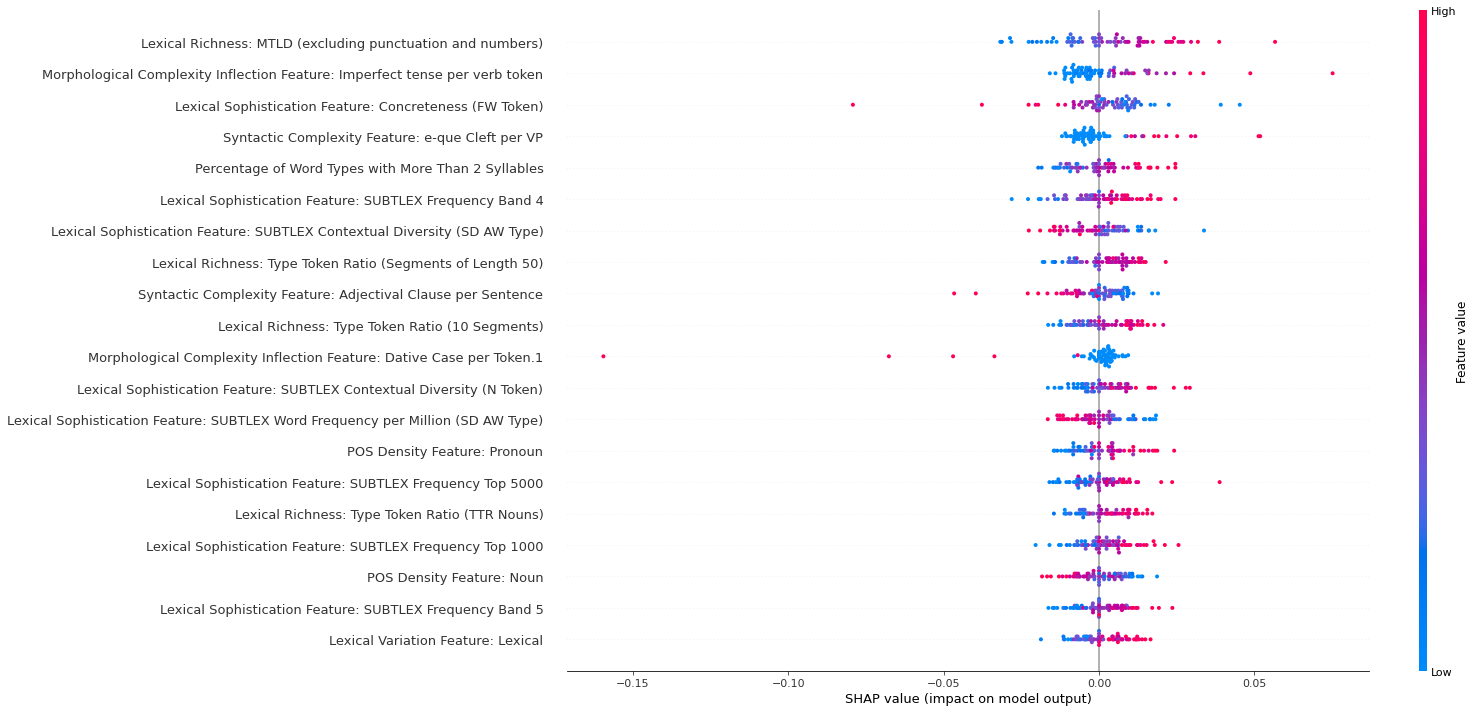

In [ ]:
shap.summary_plot(shap_values[0], X_test, feature_names = features_names, plot_size=[22,10])

## **Discriminating between 3 vs {1, 2}**

In [ ]:
# Delete level 4
df = df[df.Level != 4]

In [ ]:
# Renames levels 2 and 3
df['Level'] = df['Level'].replace([3], 0)
df['Level'] = df['Level'].replace([2], 1)

In [ ]:
df['Level'].value_counts()

1    602
0    591
Name: Level, dtype: int64

In [ ]:
# Shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 464].values

In [ ]:
# Scale feature values
X = StandardScaler().fit_transform(X)

In [ ]:
svm_model = svm.SVC(C=3, kernel='rbf')

* **Classification of levels 3 and 1+2 with cross-validation**

In [ ]:
# 10-fold Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.942 (0.022)


In [ ]:
# 10-fold Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
print('Weighted F1: %.3f (%.3f)' % (mean(scores), std(scores)))

Weighted F1: 0.942 (0.022)


* **Classification with held-out test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
svm_model.fit(X_train, y_train)

SVC(C=3)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions)) # Without undersampling

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       122
           1       0.94      0.93      0.94       117

    accuracy                           0.94       239
   macro avg       0.94      0.94      0.94       239
weighted avg       0.94      0.94      0.94       239



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[115   7]
 [  8 109]]


* **Apply SHAP with a smaller sample of the data**

In [ ]:
X = df.iloc[:350, :-1].values
y = df.iloc[:350, 464].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
# Balance class distributions
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)
print(f"Samples: {Counter(y)}")

Samples: Counter({0: 173, 1: 173})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf', probability=True)

SVC(C=3, probability=True)

In [ ]:
# compute SHAP values
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
# List of feature names
features_names = df.columns[:-1]

* **Density plots of top 20 most important features**

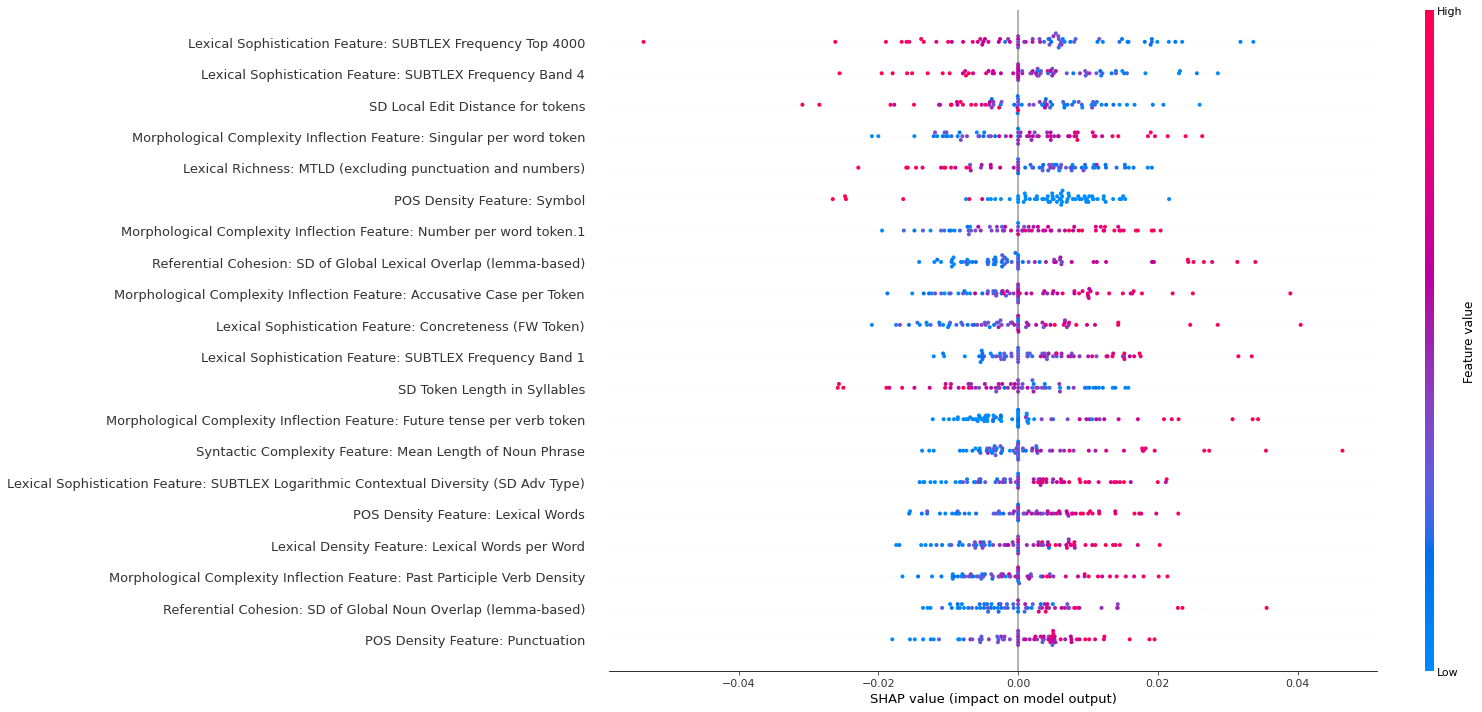

In [ ]:
shap.summary_plot(shap_values[0], X_test, feature_names = features_names, plot_size=[22,10])

## **Discriminating between 3 vs 4**

In [ ]:
# Delete levels 1 and 2
df = df[df.Level != 1]
df = df[df.Level != 2]

In [ ]:
df['Level'].value_counts()

4    697
3    591
Name: Level, dtype: int64

In [ ]:
# Rename classes 3 and 4 to o and 1
df['Level'] = df['Level'].replace([3], 0)
df['Level'] = df['Level'].replace([4], 1)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 464].values

In [ ]:
# Scale feature values
X = StandardScaler().fit_transform(X)

In [ ]:
# Balance class distributions
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)
print(f"Samples: {Counter(y)}")

Samples: Counter({0: 591, 1: 591})


* **Classification of levels 3 and 4 with cross-validation**

In [ ]:
svm_model = svm.SVC(C=3, kernel='rbf')

In [ ]:
# 10-fold Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.898 (0.026)


In [ ]:
# 10-fold Cross validation for SVM classification
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(svm_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
print('Weighted F1: %.3f (%.3f)' % (mean(scores), std(scores)))

Weighted F1: 0.898 (0.026)


* **Classification with-out test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Classification with held-out test set
svm_model.fit(X_train, y_train)

SVC(C=3)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions)) # Without undersampling

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       119
           1       0.91      0.89      0.90       118

    accuracy                           0.90       237
   macro avg       0.90      0.90      0.90       237
weighted avg       0.90      0.90      0.90       237



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[109  10]
 [ 13 105]]


* **Apply SHAP in sample of 348 instances**

In [ ]:
X = df.iloc[:765, :-1].values
y = df.iloc[:765, 464].values

In [ ]:
# Scale feature values
X = StandardScaler().fit_transform(X)

In [ ]:
# Balance class distribution
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)
print(f"Samples: {Counter(y)}")

Samples: Counter({0: 174, 1: 174})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [ ]:
svm_model = SVC(C=3, gamma='scale', kernel='rbf', probability=True)

SVC(C=3, probability=True)

In [ ]:
# compute SHAP values
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
features_names = df.columns[:-1]

* **Density plot of top 20 most important features**

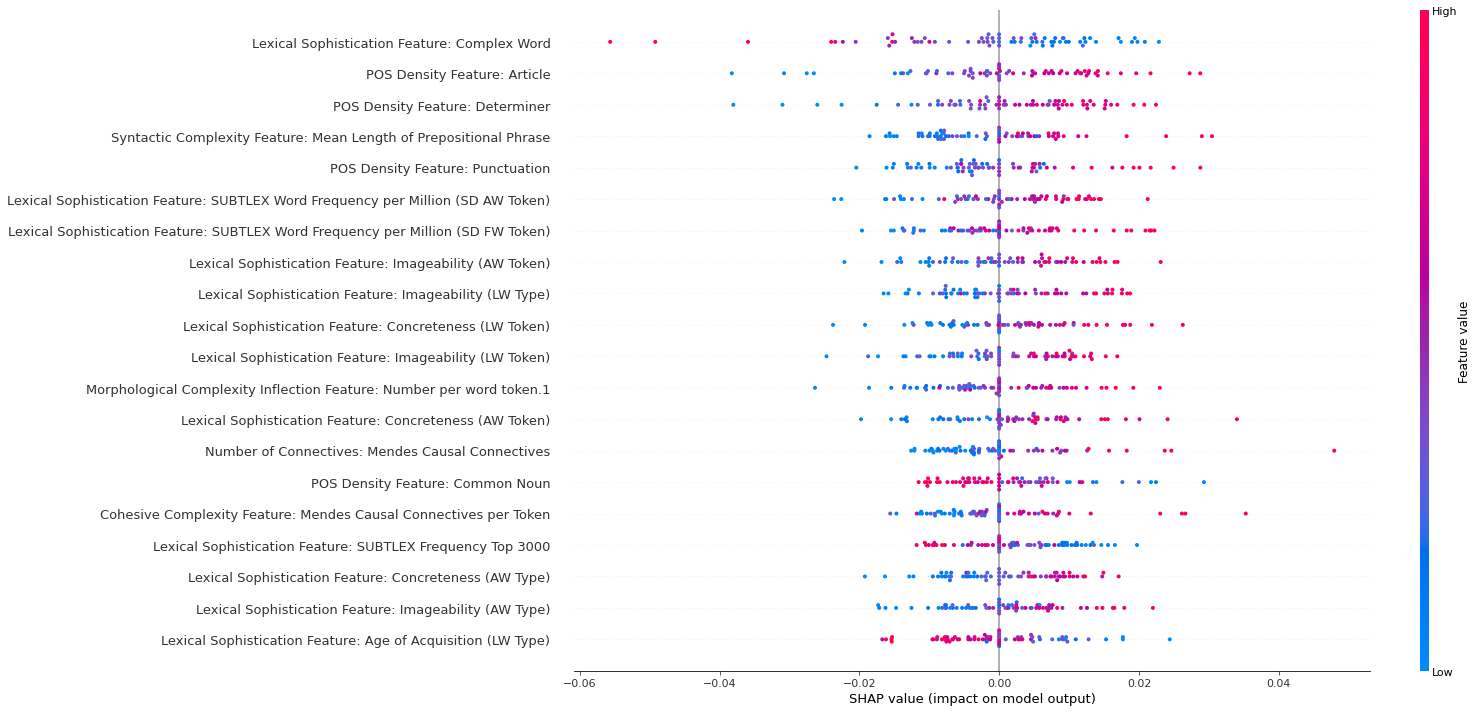

In [ ]:
shap.summary_plot(shap_values[0], X_test, feature_names = features_names, plot_size=[22,10])